In [706]:
#import libraries
import numpy as np
import scipy.optimize as opt
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')

In [707]:
def twoD_Gaussian(x, y, amplitude, xo, yo, sigma_x, sigma_y, theta, offset):
    xo = float(xo)
    yo = float(yo)    
    a = (np.cos(theta)**2)/(2*sigma_x**2) + (np.sin(theta)**2)/(2*sigma_y**2)
    b = -(np.sin(2*theta))/(4*sigma_x**2) + (np.sin(2*theta))/(4*sigma_y**2)
    c = (np.sin(theta)**2)/(2*sigma_x**2) + (np.cos(theta)**2)/(2*sigma_y**2)
    g = offset + amplitude*np.exp( - (a*((x-xo)**2) + 2*b*(x-xo)*(y-yo) 
                            + c*((y-yo)**2)))
#     x1 = np.linspace(0, 200, 201)
#     y1 = np.linspace(0, 200, 201)
#     X1, Y1 = np.meshgrid(x, y)
#     data = twoD_Gaussian(X1, Y1,amplitude, xo, yo, sigma_x, sigma_y, theta, offset)
#     data_noisy = data + 0.2*np.random.normal(size=data.shape)
    return data_noisy.ravel()

In [708]:
def gauss_func(x, y, a, x0, y0, sigma_x, sigma_y, b, offset):
    p = offset + a*np.exp(-((((x-x0)**2)/sigma_x) + (((y-y0)**2)/sigma_y) + 2*b*(x-x0)*(y-y0)))
    return p

In [709]:
# def gauss_1Dfunc(x, a, x0,  sigma_x,  offset):
#     p = offset + a*np.exp(-((((x-x0)**2)/sigma_x)))
#     return p

def gauss_1Dfunc(x, time):
#     a(time[0]), x0(time[1]),  sigma_x(time[2]),  offset (time[3])
    p = time[3] + time[0]*np.exp(-((((x-time[1])**2)/time[2])))
    return p

In [710]:
time = [ 0.2, 5, 0.02, 0]

In [711]:
q = gauss_1Dfunc(x, time)

In [712]:
x1 = np.linspace(0, 200, 201)
y1 = np.linspace(0, 200, 201)
X1, Y1 = np.meshgrid(x1, y1)

from mpl_toolkits.mplot3d import Axes3D

In [713]:
data = gauss_func(X1, Y1, 50, 100, 100, 500, 500, 0.0001, 0)
data_noisy = data + 0.2*np.random.normal(size=data.shape)
Z1 = data_noisy

In [714]:
xdata = np.vstack((X1.ravel(), Y1.ravel()))
ydata = data_noisy.ravel()

In [715]:
def gaussian(x, y, x0, y0, xalpha, yalpha, A):
    return A * np.exp( -((x-x0)/xalpha)**2 -((y-y0)/yalpha)**2)

In [716]:
def _gaussian(M, *args):
    x, y = M
    arr = np.zeros(x.shape)
    for i in range(len(args)//5):
        arr += gaussian(x, y, *args[i*5:i*5+5])
    return arr

In [717]:
# _gaussian()

In [718]:
p0=time

In [719]:
popt, pcov = curve_fit(gauss_1Dfunc, xdata, Z1.ravel(), p0)

TypeError: gauss_1Dfunc() takes 2 positional arguments but 5 were given

C:\Users\nita8\anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  


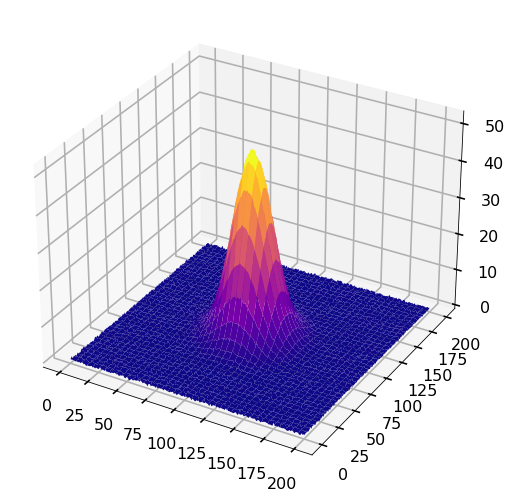

In [720]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X1, Y1, Z1, cmap='plasma')
ax.set_zlim(0,np.max(Z1)+2)
plt.show()

In [589]:
data_noisy.max()

50.22190440745626

In [590]:
df_data = pd.DataFrame(data_noisy)

In [591]:
df_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,200
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,...,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,-0.016618,-0.005063,-0.017794,0.004669,0.003405,0.003344,0.010806,-0.000070,0.017981,0.027917,...,-0.014933,0.003597,-0.015385,0.017300,-0.016349,0.016683,-0.000174,-0.005313,-0.008976,-0.003151
std,0.190385,0.206005,0.203196,0.180541,0.197181,0.201172,0.209142,0.217076,0.211621,0.212287,...,0.194260,0.188015,0.199272,0.201975,0.199864,0.200244,0.192700,0.214538,0.221008,0.210438
min,-0.724739,-0.720399,-0.578870,-0.435098,-0.592732,-0.501312,-0.460868,-0.516012,-0.677528,-0.490056,...,-0.658574,-0.571892,-0.506924,-0.484101,-0.727626,-0.813481,-0.493939,-0.609727,-0.525333,-0.534666
25%,-0.140046,-0.140302,-0.148313,-0.114099,-0.136236,-0.133639,-0.123998,-0.150781,-0.124789,-0.108843,...,-0.153684,-0.129991,-0.151785,-0.098885,-0.154255,-0.113410,-0.121434,-0.147062,-0.150441,-0.158926
50%,-0.008284,-0.000389,-0.004853,0.000301,-0.006300,-0.000706,-0.016525,-0.001916,0.018444,0.041919,...,-0.008580,0.010366,-0.009584,0.020880,-0.020089,0.017135,0.003965,0.011394,-0.000233,-0.018238
75%,0.106236,0.128843,0.108356,0.128832,0.114312,0.138926,0.165395,0.152233,0.166663,0.154752,...,0.134646,0.117736,0.105096,0.154844,0.108560,0.137683,0.104044,0.122122,0.142949,0.139853
max,0.533811,0.591388,0.560563,0.676615,0.623660,0.571256,0.656236,0.806944,0.573924,0.714059,...,0.444109,0.581410,0.599105,0.710827,0.492407,0.576932,0.436939,0.585408,0.641815,0.555456


In [592]:
#define dunction that plots the dataframe

def plot_df(df_data, vmin, vmax):    
    
    #plotting the data

    x1 = df.columns
    y1 = df.index
    z1 = df
    X1,Y1 = np.meshgrid(x1,y1)
    Z1 = z1
    img = plt.contourf(X1,Y1,Z1,50, cmap='jet', vmin=-vmin, vmax=vmax )
    plt.colorbar(img)
    return

In [593]:
# plot_df(df_data, 99, 100)

In [594]:
df_data.head()

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,200
0,-0.323571,-0.001355,-0.110622,-0.193083,0.119087,-0.197027,0.356980,0.275961,0.186527,0.146989,...,0.182448,-0.237092,-0.117028,0.324057,-0.226451,-0.078270,0.020336,0.239548,-0.000233,-0.123744
1,-0.291071,0.158597,0.054950,-0.066010,-0.204391,-0.207925,-0.158688,-0.382635,-0.032302,0.004204,...,0.205599,-0.162506,-0.002828,0.213059,0.226734,0.262863,0.110721,0.169002,-0.037692,-0.421435
2,-0.006018,-0.239930,0.018761,-0.014527,0.090017,-0.067762,-0.255880,0.079310,0.253077,-0.292635,...,0.301216,0.083255,0.065636,0.117891,0.179084,-0.060402,-0.080710,0.142024,-0.145664,0.165919
3,-0.293186,-0.181325,-0.128488,0.337087,0.286930,0.091653,-0.143131,0.208951,-0.151520,-0.212943,...,0.004562,0.191364,0.357567,0.177725,-0.038353,-0.211956,0.075911,0.392338,0.333933,-0.216313
4,0.056661,-0.305734,-0.048860,-0.070083,-0.278394,0.033622,-0.365279,0.287362,-0.173302,0.213352,...,-0.014835,-0.024142,-0.034191,-0.218797,-0.290231,0.238702,-0.003865,0.257074,-0.146061,-0.007853


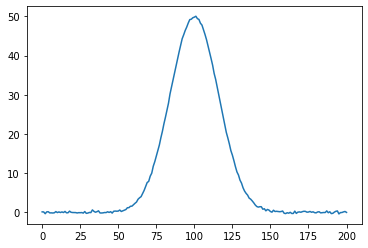

In [595]:
plt.plot(df_data.iloc[100])

In [596]:
df_data.shape[0]

201

In [597]:
from scipy.optimize import least_squares

In [598]:
def func_A(t, time):
#     B=20
#     t0 = 2.38110371e+02
    t0 = 0
    offset = 100
#     f = (np.exp((B/(2*1.66511*t_i))**2 - ((t-t0)/t_i))*0.5*(erf(((t-t0)/B)*1.66511 - (B/(2*1.66511*t_i))) + 1)) 
    f = offset + a*(np.exp(-(t-t0)/(time[0])) + np.exp(-(t-t0)/(time[1])) + np.exp(-(t-t0)/(time[2])) + np.exp(-(t-t0)/(time[3])))
    return 

In [605]:
# time = [10, 20, 50, 200]
t = np.linspace(1, 100, 201)
time = [ 0.2, 50, 10, 0]

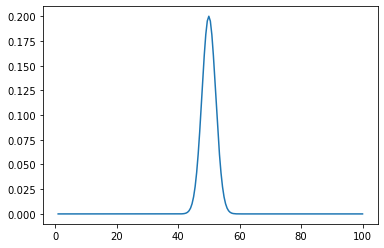

In [606]:
plt.plot(t, gauss_1Dfunc(t, time))
# a, x0,  sigma_x,  offset

In [675]:
t = np.linspace(1, 100, 201)
T_matrix = np.zeros((df_data.shape[0], df_data.shape[1]))
for i in range(T_matrix.shape[0]):
    T_matrix[i] = gauss_1Dfunc(t, time)

In [678]:
T_df = pd.DataFrame(T_matrix)
data_matrix = np.array(df_data)

In [679]:
x1 = t
y1 = t
z1 = df
X1,Y1 = np.meshgrid(x1,y1)
Z1 = z1

In [680]:
Z1

,Wavelength,-500.0,-490.0,-480.0,-470.0,-460.0,-450.0,-440.0,-430.0,-420.0,...,4910.0,4920.0,4930.0,4940.0,4950.0,4960.0,4970.0,4980.0,4990.0,5000.0
0,549.8464,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,550.0243,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,550.2022,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,550.3801,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,550.5580,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047,736.1077,0.273802,-0.351431,0.442094,-0.502174,-0.304459,-1.180041,-0.216812,-0.649647,-0.372488,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1048,736.2856,-0.862387,0.164693,-0.143945,-0.017807,0.070349,-0.554203,-0.293273,0.143734,0.355942,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1049,736.4635,-0.601376,-0.567819,0.114592,-0.263832,0.510414,-0.609755,-0.110617,0.168649,-0.505276,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1050,736.6414,-0.512675,0.603772,0.549889,-0.252057,0.062897,-0.730556,-0.557896,-0.202102,-0.881642,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [677]:
T_matrix.shape

(201, 201)

In [610]:
for i in range(T_matrix.shape[0]):
    T_matrix[i] = gauss_1Dfunc(t, time)

In [611]:
# plt.plot(T_matrix[0])

In [612]:
xdata = np.vstack((X.ravel(), Y.ravel()))
ydata = Z.ravel()

In [652]:
data_matrix.shape

(201, 201)

In [653]:
# data_matrix

In [666]:
def opt(time):
    t = np.linspace(1, 100, 201)
    T_matrix = np.zeros((df_data.shape[0], df_data.shape[1]))
    for i in range(T_matrix.shape[0]):
        T_matrix[i] = gauss_1Dfunc(t, time)
    
    T_df = pd.DataFrame(T_matrix)
    data_matrix = np.array(df_data)
    res_matrix = T_matrix - data_matrix
    return res_matrix

In [667]:
res_matrix = opt(time)

In [668]:
res_matrix.shape

(201, 201)

In [669]:
# res_matrix

In [670]:
x0 = time

In [671]:
x0

[0.2, 50, 10, 0]

In [673]:
# opt().shape

In [674]:
res_lsq = least_squares(opt, x0)

ValueError: `fun` must return at most 1-d array_like. f0.shape: (201, 201)

In [660]:
# for i in range(201):
#     res_lsq[i] = least_squares(opt, x0)

ValueError: `fun` must return at most 1-d array_like. f0.shape: (201, 201)

In [625]:
res_matrix.shape[0]

201

In [626]:
res = np.zeros((res_matrix.shape[0], res_matrix.shape[1]))

In [633]:
len(res_matrix[0])

201

In [635]:
# res[0]

In [640]:
# for i in range(res_matrix.shape[0]):
#     res[i] = least_squares(res_matrix[i], time)

In [568]:
alpha = np.linalg.lstsq(T_matrix, data_matrix, rcond=None)[0]

In [573]:
alpha.shape

(201, 201)

In [574]:
pd.DataFrame(alpha).describe()

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,200
count,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02,...,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02
mean,-3.876202e-06,-1.748362e-06,-8.564173e-07,-2.257348e-06,-2.501684e-07,2.493299e-06,-1.893278e-06,9.057207e-08,-9.241644e-08,-1.631612e-06,...,1.964348e-06,-8.787142e-07,9.481173e-07,1.055324e-06,1.693092e-07,2.238811e-06,-4.049398e-07,1.992935e-06,-2.497872e-07,2.223334e-06
std,1.090512e-05,4.918757e-06,2.409403e-06,6.350715e-06,7.038118e-07,7.014526e-06,5.326457e-06,2.548111e-07,2.600000e-07,4.590300e-06,...,5.526402e-06,2.472132e-06,2.667388e-06,2.968999e-06,4.763264e-07,6.298563e-06,1.139238e-06,5.606828e-06,7.027393e-07,6.255020e-06
min,-4.865384e-05,-2.194533e-05,-1.074970e-05,-2.833409e-05,-3.140098e-06,0.000000e+00,-2.376431e-05,0.000000e+00,-1.160005e-06,-2.047990e-05,...,0.000000e+00,-1.102957e-05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-5.082779e-06,0.000000e+00,-3.135313e-06,0.000000e+00
25%,-2.285723e-08,-1.030976e-08,-5.050131e-09,-1.331115e-08,-1.475196e-09,3.757413e-35,-1.116430e-08,1.364925e-36,-5.449623e-10,-9.621309e-09,...,2.960281e-35,-5.181611e-09,1.428817e-35,1.590379e-35,2.551498e-36,3.373898e-35,-2.387853e-09,3.003363e-35,-1.472948e-09,3.350574e-35
50%,-2.399480e-18,-1.082286e-18,-5.301468e-19,-1.397363e-18,-1.548614e-19,1.543423e-18,-1.171993e-18,5.606670e-20,-5.720842e-20,-1.010015e-18,...,1.215987e-18,-5.439492e-19,5.869117e-19,6.532759e-19,1.048072e-19,1.385888e-18,-2.506693e-19,1.233684e-18,-1.546254e-19,1.376307e-18
75%,-5.841454e-35,-2.634789e-35,-1.290625e-35,-3.401834e-35,-3.770050e-36,1.470251e-08,-2.853179e-35,5.340863e-10,-1.392720e-36,-2.458847e-35,...,1.158339e-08,-1.324226e-35,5.590868e-09,6.223047e-09,9.983844e-10,1.320184e-08,-6.102461e-36,1.175196e-08,-3.764304e-36,1.311058e-08
max,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.129573e-05,0.000000e+00,1.136855e-06,0.000000e+00,0.000000e+00,...,2.465637e-05,0.000000e+00,1.190071e-05,1.324636e-05,2.125159e-06,2.810141e-05,0.000000e+00,2.501520e-05,0.000000e+00,2.790714e-05


In [577]:
pd.DataFrame(data_matrix).describe()

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,200
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,...,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,-0.027546,-0.012425,-0.006086,-0.016042,-0.001778,0.017718,-0.013454,0.000644,-0.000657,-0.011595,...,0.013959,-0.006245,0.006738,0.007500,0.001203,0.015910,-0.002878,0.014163,-0.001775,0.015800
std,0.199989,0.200909,0.183814,0.189741,0.192720,0.215048,0.195936,0.199520,0.192682,0.216206,...,0.206426,0.194971,0.217721,0.193827,0.195487,0.188295,0.213155,0.203171,0.207743,0.205218
min,-0.656887,-0.567619,-0.549281,-0.500027,-0.476822,-0.497359,-0.624679,-0.589083,-0.517374,-0.764736,...,-0.559251,-0.502632,-0.544749,-0.497164,-0.442994,-0.466923,-0.509657,-0.541451,-0.535088,-0.573521
25%,-0.150660,-0.143445,-0.140507,-0.123478,-0.132133,-0.120607,-0.135513,-0.135674,-0.142421,-0.157797,...,-0.129123,-0.131086,-0.143650,-0.111066,-0.129130,-0.113305,-0.145440,-0.118554,-0.148175,-0.132054
50%,-0.030255,-0.009211,0.016197,-0.014901,0.014433,0.034385,-0.019090,-0.005832,-0.003163,-0.002783,...,0.007618,-0.002055,0.009061,0.005708,0.001981,0.005323,0.019795,0.009318,-0.020905,-0.001664
75%,0.119915,0.126464,0.121337,0.110050,0.119338,0.153597,0.107324,0.117685,0.127282,0.145424,...,0.141800,0.113699,0.160525,0.150793,0.113500,0.139167,0.144945,0.146293,0.150134,0.149204
max,0.449096,0.493800,0.456968,0.502012,0.565754,0.627770,0.460377,0.616883,0.548566,0.478226,...,0.576583,0.593039,0.586949,0.539491,0.537221,0.443680,0.519661,0.620972,0.699189,0.648245


In [578]:
pd.DataFrame(T_matrix).describe()

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,200
count,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02,...,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02
mean,3.646846e-51,4.073597e-50,4.440147e-49,4.722537e-48,4.901309e-47,4.963723e-46,4.905256e-45,4.730145e-44,4.450881e-43,4.086732e-42,...,4.519565e-44,4.684561e-45,4.738052e-46,4.676161e-47,4.503371e-48,4.231991e-49,3.880703e-50,3.472441e-51,3.031922e-52,2.583210e-53
std,1.130414e-65,8.091386e-65,1.903855e-63,1.584008e-62,1.949548e-61,7.018373e-61,3.743132e-60,1.996337e-58,7.186814e-58,1.341539e-56,...,0.000000e+00,7.486264e-60,1.793584e-60,1.559638e-61,5.483104e-63,1.446930e-63,4.283675e-65,9.519277e-66,8.924322e-67,7.436935e-68
min,3.646846e-51,4.073597e-50,4.440147e-49,4.722537e-48,4.901309e-47,4.963723e-46,4.905256e-45,4.730145e-44,4.450881e-43,4.086732e-42,...,4.519565e-44,4.684561e-45,4.738052e-46,4.676161e-47,4.503371e-48,4.231991e-49,3.880703e-50,3.472441e-51,3.031922e-52,2.583210e-53
25%,3.646846e-51,4.073597e-50,4.440147e-49,4.722537e-48,4.901309e-47,4.963723e-46,4.905256e-45,4.730145e-44,4.450881e-43,4.086732e-42,...,4.519565e-44,4.684561e-45,4.738052e-46,4.676161e-47,4.503371e-48,4.231991e-49,3.880703e-50,3.472441e-51,3.031922e-52,2.583210e-53
50%,3.646846e-51,4.073597e-50,4.440147e-49,4.722537e-48,4.901309e-47,4.963723e-46,4.905256e-45,4.730145e-44,4.450881e-43,4.086732e-42,...,4.519565e-44,4.684561e-45,4.738052e-46,4.676161e-47,4.503371e-48,4.231991e-49,3.880703e-50,3.472441e-51,3.031922e-52,2.583210e-53
75%,3.646846e-51,4.073597e-50,4.440147e-49,4.722537e-48,4.901309e-47,4.963723e-46,4.905256e-45,4.730145e-44,4.450881e-43,4.086732e-42,...,4.519565e-44,4.684561e-45,4.738052e-46,4.676161e-47,4.503371e-48,4.231991e-49,3.880703e-50,3.472441e-51,3.031922e-52,2.583210e-53
max,3.646846e-51,4.073597e-50,4.440147e-49,4.722537e-48,4.901309e-47,4.963723e-46,4.905256e-45,4.730145e-44,4.450881e-43,4.086732e-42,...,4.519565e-44,4.684561e-45,4.738052e-46,4.676161e-47,4.503371e-48,4.231991e-49,3.880703e-50,3.472441e-51,3.031922e-52,2.583210e-53


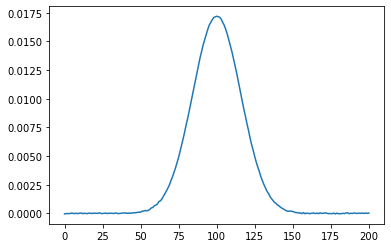

In [572]:
plt.plot(pd.DataFrame(alpha).iloc[100])
# plt.plot(pd.DataFrame(df_data).iloc[100], 'r')

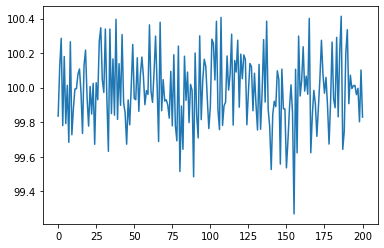

In [455]:
plt.plot(pd.DataFrame(df_data).iloc[0])

In [452]:
# plot_df(pd.DataFrame(alpha), 0, 10)

In [ ]:
plt.plot()

In [385]:
x0 = [1, 50, 20, 0.2, 0]

In [388]:
# np.ravel(df_data)

In [391]:
# res_1 = least_squares(gauss_1Dfunc, x0)
res_lsq = least_squares(gauss_1Dfunc, x0)

TypeError: gauss_1Dfunc() missing 5 required positional arguments: 'a', 'x0', 'sigma_x', 'b', and 'offset'

In [ ]:
for i in range(df_data.shape[0]):
    
    

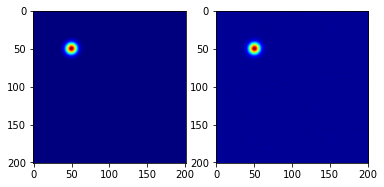

In [285]:
fig, ax = plt.subplots(1, 2, figsize=(6,6))
ax[0].imshow(data.reshape(201, 201), cmap='jet')
ax[1].imshow(data_noisy.reshape(201, 201), cmap='jet')

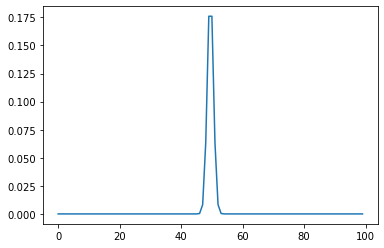

In [154]:
plt.plot(q)

In [155]:
# plt.plot(x, y1)

In [136]:
x1 = np.linspace(0, 50, 50)
y1 = np.linspace(0, 50, 50)
X1, Y1 = np.meshgrid(x1, y1)

In [137]:
# b, x0, y0 = 0.2, 50, 50
# a, x0, y0, sigma_x, sigma_y, b, offset
data = gauss_func(X1, Y1, 10, 5, 5, 2, 2, 5, 0) 
# data = gauss_func(X1, 0.2, 50, 20, 5) + gauss_func(Y1, 0.2, 50, 10, 5) + np.exp(-2*b*(X1-x0)*(Y1-y0))

C:\Users\nita8\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
C:\Users\nita8\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in multiply
  


C:\Users\nita8\anaconda3\lib\site-packages\matplotlib\image.py:446: RuntimeWarning: overflow encountered in double_scalars
  newmin = vmid - dv * fact
C:\Users\nita8\anaconda3\lib\site-packages\matplotlib\image.py:451: RuntimeWarning: overflow encountered in double_scalars
  newmax = vmid + dv * fact


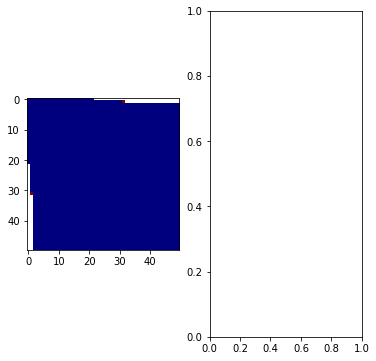

In [144]:
fig, ax = plt.subplots(1, 2, figsize=(6,6))
ax[0].imshow(data.reshape(50, 50), cmap='jet')
# ax[1].imshow(data_noisy.reshape(201, 201), cmap='jet')

In [140]:
df_try = pd.DataFrame(data)

In [141]:
df_try.describe()

C:\Users\nita8\anaconda3\lib\site-packages\numpy\lib\function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
count,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,...,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0
mean,inf,inf,8.722468e+187,3.144293e+80,6.643117e+17,8.225933e-01,9.394785e+17,2.551502e+39,2.448800e+60,8.296770e+80,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
std,NaN,NaN,inf,1.162442e+81,2.455953e+18,3.041123e+00,6.636100e+18,1.804184e+40,1.731563e+61,5.866702e+81,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,3.706956e-119,5.206988e-95,2.581986e-71,2.292929e-61,3.737123e-260,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,4.107951e+159,9.440120e+124,7.658224e+89,1.352767e+07,1.256196e-92,4.417937e-233,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,NaN,2.476657e+260,6.996057e+155,2.521953e+48,5.328265e-15,3.765407e-91,8.589588e-178,6.917212e-265,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,NaN,NaN,5.149755e+180,1.856395e+73,3.922104e+10,1.838417e-14,7.705236e-47,1.140105e-79,5.955279e-113,1.098140e-146,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,inf,inf,1.766169e+189,6.366724e+81,1.345132e+19,1.665631e+01,4.692528e+19,1.275751e+41,1.224400e+62,4.148385e+82,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf


In [142]:
#define dunction that plots the dataframe

def plot_df(df, vmin, vmax):    
    
    #plotting the data

    x1 = df.columns
    y1 = df.index
    z1 = df
    X1,Y1 = np.meshgrid(x1,y1)
    Z1 = z1
    img = plt.contourf(X1,Y1,Z1,50, cmap='jet', vmin=-vmin, vmax=vmax )
    plt.colorbar(img)
    return

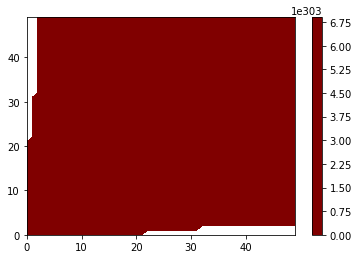

In [143]:
plot_df(df_try, 100, 100)

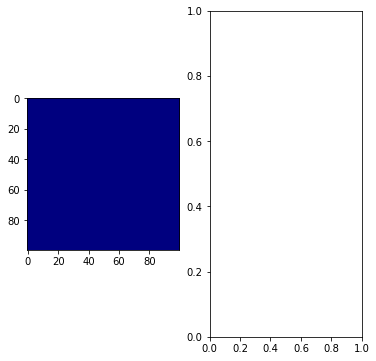

In [102]:
# fig, ax = plt.subplots(1, 2, figsize=(6,6))
# ax[0].imshow(data.reshape(100, 100), cmap='jet')
ax[0].imshow(data, cmap='jet')
# ax[1].imshow(data.reshape(100, 100), cmap='jet')

In [ ]:
# data = twoD_Gaussian(X1, Y1, 3, 100, 100, 20, 40, 0, 10)

In [29]:
# Create x and y indices

# y1 = np.linspace(0, 2, 1)
# X1, Y1 = np.meshgrid(x1, y1)

#create data
# data = twoD_Gaussian(X1, Y1, 3, 100, 100, 20, 40, 0, 10)
# data_noisy = data + 0.2*np.random.normal(size=data.shape)

# fig, ax = plt.subplots(1, 2, figsize=(6,6))
# ax[0].imshow(data.reshape(201, 201), cmap='jet')
# ax[1].imshow(data_noisy.reshape(201, 201), cmap='jet')

In [30]:
x1

array([0. , 0.5, 1. , 1.5, 2. ])

In [2]:
#import the raw file

df = pd.read_csv('C:/UofT/Data analysis/TA data analysis_Nita/Phil_Rajib_project/Analysis/Pt1_DCM_chirp_corrected.csv')
df.head(2)

,Wavelength,-500.0,-490.0,-480.0,-470.0,-460.0,-450.0,-440.0,-430.0,-420.0,...,4910.0,4920.0,4930.0,4940.0,4950.0,4960.0,4970.0,4980.0,4990.0,5000.0
0,549.8464,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,550.0243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
#set the first column as the index

df1 = df.set_index('Wavelength')
df1.head(2)

,-500.0,-490.0,-480.0,-470.0,-460.0,-450.0,-440.0,-430.0,-420.0,-410.0,...,4910.0,4920.0,4930.0,4940.0,4950.0,4960.0,4970.0,4980.0,4990.0,5000.0
Wavelength,,,,,,,,,,,,,,,,,,,,,
549.8464,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
550.0243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# change the column values to float type

k = [float(i) for i in list(df1.columns)]
df1.columns = k

In [5]:
#define dunction that plots the dataframe

def plot_df(df, vmin, vmax):    
    
    #plotting the data

    x1 = df.columns
    y1 = df.index
    z1 = df
    X1,Y1 = np.meshgrid(x1,y1)
    Z1 = z1
    img = plt.contourf(X1,Y1,Z1,50, cmap='jet', vmin=-vmin, vmax=vmax )
    plt.colorbar(img)
    return

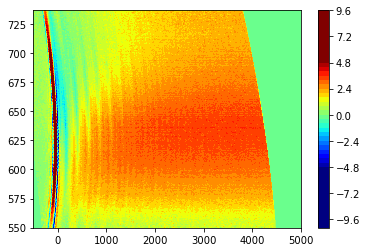

In [6]:
plot_df(df1, 5,5)

In [7]:
from scipy.optimize import curve_fit
from scipy.special import erf

def func_B(t, t_1):
    B=20
    t0 = 2.38110371e+02
    f = (np.exp((B/(2*1.66511*t_1))**2 - ((t-t0)/t_1))*0.5*(erf(((t-t0)/B)*1.66511 - (B/(2*1.66511*t_1))) + 1)) 
    return f   

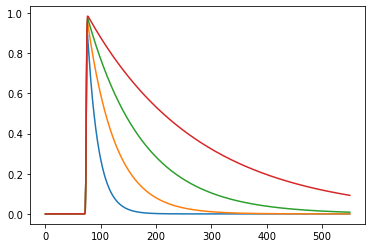

In [9]:
# t0=2.38110371e+02
time = [200, 500, 1000, 2000]
t1 = list(df1.columns)

for i in range(len(time)):
    plt.plot(func_B (np.array(t1), time[i]))


In [9]:
func_B (np.array(t1), 200).shape

(551,)

In [10]:
# n is the number of components

n = 4
T_matrix = np.zeros(shape=(n, df1.shape[1]))

In [11]:
T_matrix.shape

(4, 551)

In [12]:
for i in range (n):
    T_matrix[i-1] = func_B (np.array(t1), time[i-1])

In [13]:
T_matrix  # this is the Time matrix that you want; you need to calculate teh inverse of that

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        5.05253229e-11, 4.80611738e-11, 4.57172027e-11],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        7.60868590e-05, 7.45802383e-05, 7.31034506e-05],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        8.72246357e-03, 8.63567361e-03, 8.54974722e-03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        9.33932882e-02, 9.29274872e-02, 9.24640094e-02]])

In [14]:
#calculate the pseudo-inverse of a matrix

T_matrix_inv = np.linalg.pinv(T_matrix)

In [15]:
T_matrix_inv.shape

(551, 4)

In [16]:
T_matrix.shape

(4, 551)

In [17]:
# calculate DT^-1

S_bar = np.matmul(df1, T_matrix_inv)

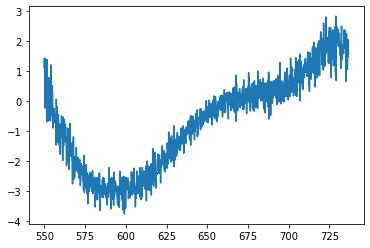

In [18]:
plt.plot(S_bar[1-1])

In [19]:
type(range(4))

range

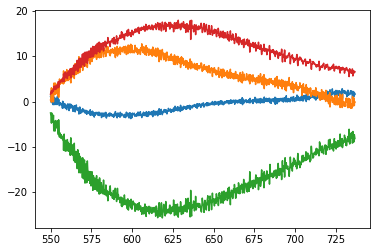

In [20]:
for i in list(range(4)):
    plt.plot(S_bar[i])

In [21]:
#construct S_bar*T

pseudo_data = np.matmul(S_bar, T_matrix)

In [22]:
pseudo_data.shape

(1052, 551)

In [23]:
# optimization

opt = (np.linalg.norm(df1 - pseudo_data))**2

In [24]:
opt

nan

In [25]:
opt.max()

nan

In [26]:
# plot_df(opt, 0.2, 0.2)

In [27]:
T_matrix[0] = func_B (np.array(t1), 200)

In [28]:
T_matrix.shape

(4, 551)

In [29]:
T_matrix

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        5.05253229e-11, 4.80611738e-11, 4.57172027e-11],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        7.60868590e-05, 7.45802383e-05, 7.31034506e-05],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        8.72246357e-03, 8.63567361e-03, 8.54974722e-03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        9.33932882e-02, 9.29274872e-02, 9.24640094e-02]])

In [30]:
def func_B(t, t_i):
    B=20
    t0 = 2.38110371e+02
    f = (np.exp((B/(2*1.66511*t_i))**2 - ((t-t0)/t_i))*0.5*(erf(((t-t0)/B)*1.66511 - (B/(2*1.66511*t_i))) + 1)) 
    return f

In [31]:
def global_analysis(time):
    
    n = 4
    t1 = list(df1.columns)
    
    T_matrix = np.zeros(shape=(n, df1.shape[1]))  # n is the number of components
    
    for i in range (n):
        T_matrix[i-1] = func_B (np.array(t1), time[i-1]) # this is the Time matrix that you want; 
                                                     # you need to calculate teh inverse of that
        
    T_matrix_inv = np.linalg.pinv(T_matrix)       #calculate the pseudo-inverse of a matrix
    
    S_bar = np.matmul(df1, T_matrix_inv)         # calculate DT^-1
    
    pseudo_data = np.matmul(S_bar, T_matrix)    #construct S_bar*T
    
    pseudo_data.columns = df1.columns         #reassign the columns
    
    opt = (np.linalg.norm(df1 - pseudo_data))**2      # define the matrix to optimize
    
    return opt
#     return S_bar
    

In [32]:
# time = [200, 500, 1000, 2000]

global_analysis (time)

531876.1560697469

In [33]:
df1.head(5)

,-500.0,-490.0,-480.0,-470.0,-460.0,-450.0,-440.0,-430.0,-420.0,-410.0,...,4910.0,4920.0,4930.0,4940.0,4950.0,4960.0,4970.0,4980.0,4990.0,5000.0
Wavelength,,,,,,,,,,,,,,,,,,,,,
549.8464,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
550.0243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
550.2022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
550.3801,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
550.5580,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
# this is teh optimization

from scipy.optimize import least_squares, minimize, basinhopping


t_guess = [5 , 20000 , 1000, 30000]
# res_2 = minimize(global_analysis, t_guess, method='Nelder-Mead')
# res_3 = basinhopping(global_analysis, t_guess, T= 1.0)
res_3 = least_squares(global_analysis, t_guess)
# res_1 = least_squares(global_analysis, t_guess, bounds=(0, 10000))

In [52]:
res_3

 active_mask: array([0., 0., 0., 0.])
        cost: 93322267625.6387
         fun: array([432023.76699816])
        grad: array([-4043.01733264,  1345.05056186,  6494.78846605,   458.64885606])
         jac: array([[-0.00935832,  0.00311337,  0.01503341,  0.00106163]])
     message: '`xtol` termination condition is satisfied.'
        nfev: 30
        njev: 19
  optimality: 6494.788466052864
      status: 3
     success: True
           x: array([28867.60637171, 32071.84140575, 39879.67611427, 37836.17221845])

In [53]:
# rebuilt S_bar with the optimized values

def DAS (time):
    
    t1 = list(df1.columns)
    n = 4
    T_matrix = np.zeros(shape=(n, df1.shape[1]))  # n is the number of components
    
    for i in range (n):
        T_matrix[i-1] = func_B (np.array(t1), time[i-1]) # this is the Time matrix that you want; 
                                                     # you need to calculate teh inverse of that
        
    T_matrix_inv = np.linalg.pinv(T_matrix)       #calculate the pseudo-inverse of a matrix
    
    S_bar = np.matmul(df1, T_matrix_inv)         # calculate DT^-1
    
    return S_bar




In [54]:
def pseudo_data (time):
    
    n = 4
    t1 = list(df1.columns)
    
    T_matrix = np.zeros(shape=(n, df1.shape[1]))  # n is the number of components
    
    for i in range (n):
        T_matrix[i-1] = func_B (np.array(t1), time[i-1]) # this is the Time matrix that you want; 
                                                     # you need to calculate teh inverse of that
        
    T_matrix_inv = np.linalg.pinv(T_matrix)       #calculate the pseudo-inverse of a matrix
    
    S_bar = np.matmul(df1, T_matrix_inv)         # calculate DT^-1
    
    pseudo_data = np.matmul(S_bar, T_matrix)    #construct S_bar*T
    
    pseudo_data.columns = df1.columns         #reassign the columns
    
    return pseudo_data
    
    

In [55]:
x = [11493.22366105, 11400.55744635, -1391.88889464, 11489.75092222]

das = DAS(x)
PD = pseudo_data(x)

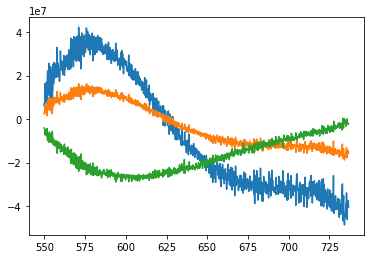

In [56]:
#DAS after optimization

plt.plot(das[0])
plt.plot(das[1]*10)
plt.plot(das[2]*100000000)

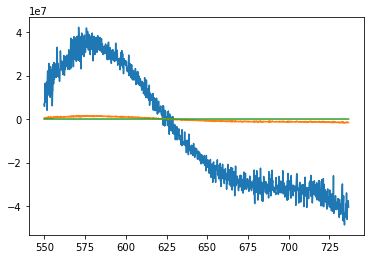

In [57]:
for i in list(range(3)):
    plt.plot(das[i])

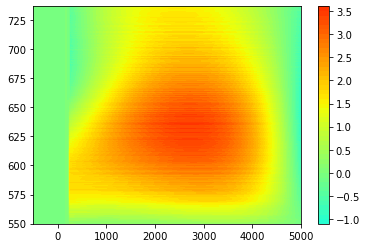

In [58]:
plot_df(PD, 5, 5)

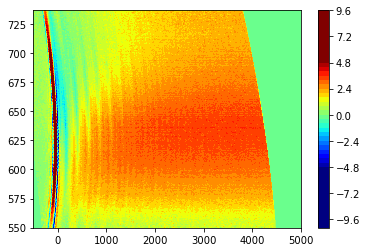

In [59]:
plot_df(df1, 5, 5)

In [43]:
def global_analysis(n, t_1, t_2, t_3, t_4):
    
    time = [t_1, t_2, t_3, t_4]
    t1 = list(df1.columns)
    
    T_matrix = np.zeros(shape=(n, df1.shape[1]))  # n is the number of components
    
    for i in range (n):
    T_matrix[i-1] = func_B (np.array(t1), time[i-1]) # this is the Time matrix that you want; 
                                                     # you need to calculate teh inverse of that
        
    T_matrix_inv = np.linalg.pinv(T_matrix)       #calculate the pseudo-inverse of a matrix
    
    S_bar = np.matmul(df1, T_matrix_inv)         # calculate DT^-1
    
#     pseudo_data = np.matmul(S_bar, T_matrix)    #construct S_bar*T
    
#     opt = (np.linalg.norm(df1 - pseudo_data))**2      # optimization

    return S_bar
    

IndentationError: expected an indented block (<ipython-input-43-1be0c277d976>, line 9)